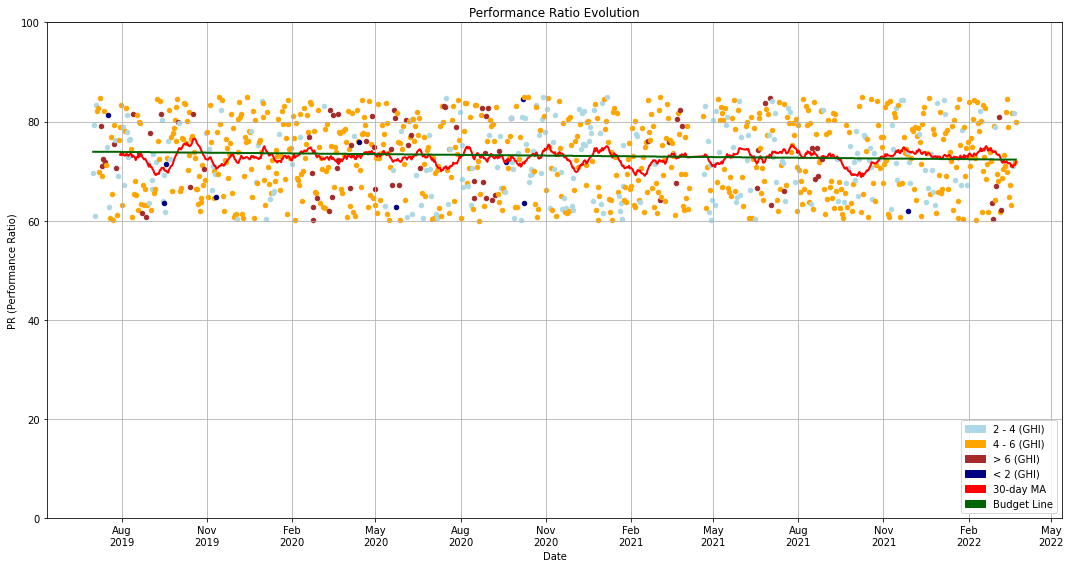

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

data = pd.read_excel('Assignment_Dataset.xlsx')

ghi_color_map = {
    '< 2': 'navy',
    '2 - 4': 'lightblue',
    '4 - 6': 'orange',
    '> 6': 'brown'
}

data['Date'] = pd.to_datetime(data['Date'])

#30-day moving average of PR values
data['30-day MA'] = data['PR'].rolling(window=30).mean()

# Buget line Calculation
start_budget = 73.9
reduction_rate = 0.008
data['Budget'] = start_budget * (1 - reduction_rate) ** ((data['Date'].dt.year - data['Date'].dt.year.min()) + (data['Date'].dt.month - 7) / 12.0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

legend_handles = {}

# Plotting Graph
for index, row in data.iterrows():
    ghi_range = ''
    if row['GHI'] < 2:
        ghi_range = '< 2'
    elif row['GHI'] < 4:
        ghi_range = '2 - 4'
    elif row['GHI'] < 6:
        ghi_range = '4 - 6'
    else:
        ghi_range = '> 6'
    
    color = ghi_color_map[ghi_range]
    
    # Creating a custom legend 
    if color not in legend_handles:
        legend_handles[color] = Patch(color=color, label=f'{ghi_range} (GHI)')
    
    ax.scatter(row['Date'], row['PR'], color=color, s=20)

# Plot the 30-day moving average line in red
ax.plot(data['Date'], data['30-day MA'], color='red', label='30-day MA', linewidth=2)

# Plot the budget line in dark green
ax.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget Line', linewidth=2)

# Formatting the x-axis dates and labels and setting y-axis range from 0 to 100
ax.set_ylim(0, 100)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.tick_params(axis='x', rotation=0, labelsize=10)

# Adding labels, title, grid, custom legend, plotting the graph and saving image
ax.set_xlabel('Date')
ax.set_ylabel('PR (Performance Ratio)')
ax.set_title('Performance Ratio Evolution')
ax.grid(True)

handles = [*legend_handles.values(), Patch(color='red', label='30-day MA'), Patch(color='darkgreen', label='Budget Line')]
ax.legend(handles=handles, loc='lower right')

plt.tight_layout()

plt.savefig('Performance_ratio_evoluiton')

plt.show()
